In [2]:
# Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
#  Label
# BENIGN          288566
# Infiltration        36

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',encoding='utf-8')
df.dtypes
# df['Destination-Port'] = df['Destination-Port'].astype(str, errors = 'raise')
dfn = df.convert_dtypes()
df.head(10)
# dfn.dtypes
print(dfn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288602 entries, 0 to 288601
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             288602 non-null  Int64  
 1    Flow Duration                288602 non-null  Int64  
 2    Total Fwd Packets            288602 non-null  Int64  
 3    Total Backward Packets       288602 non-null  Int64  
 4   Total Length of Fwd Packets   288602 non-null  Int64  
 5    Total Length of Bwd Packets  288602 non-null  Int64  
 6    Fwd Packet Length Max        288602 non-null  Int64  
 7    Fwd Packet Length Min        288602 non-null  Int64  
 8    Fwd Packet Length Mean       288602 non-null  Float64
 9    Fwd Packet Length Std        288602 non-null  Float64
 10  Bwd Packet Length Max         288602 non-null  Int64  
 11   Bwd Packet Length Min        288602 non-null  Int64  
 12   Bwd Packet Length Mean       288602 non-nul

In [3]:
target = dfn[' Label']
inputs = dfn
target.sample(10)

28988     BENIGN
183638    BENIGN
236066    BENIGN
169126    BENIGN
169174    BENIGN
62653     BENIGN
276142    BENIGN
251220    BENIGN
175864    BENIGN
167143    BENIGN
Name:  Label, dtype: string

In [6]:
tag = df.groupby(' Label')[' Label'].agg('count')
tag

 Label
BENIGN          288566
Infiltration        36
Name:  Label, dtype: int64

In [4]:
dfn.to_csv('all_data.csv', encoding='utf-8')

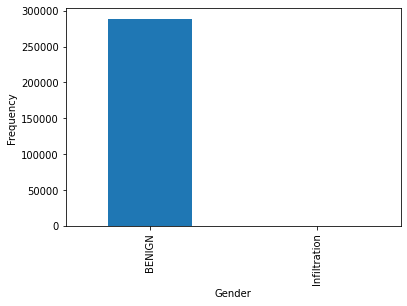

In [7]:
target.value_counts().plot(kind='bar')
plt.xticks([0,1], ['BENIGN', 'Infiltration'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y=le.fit_transform(target)

print(np.average(Y))
X=dfn.iloc[:,:-1]
X.astype(np.float32,copy=False)

X.drop(X.columns[14], axis=1,inplace=True)
X.drop(X.columns[14], axis=1,inplace=True)

print(X.shape)
X.dropna()
print(X.shape,np.max(np.max(X).astype(np.float32)))
count = -1
for i in np.max(X).astype(np.float32):
    count += 1
    print(count, '---',i)

0.00012473926029618645
(288602, 76)
(288602, 76) 120000000.0
0 --- 65533.0
1 --- 119999936.0
2 --- 22673.0
3 --- 44553.0
4 --- 12900000.0
5 --- 63600000.0
6 --- 23360.0
7 --- 2065.0
8 --- 4317.09765625
9 --- 4467.11328125
10 --- 11680.0
11 --- 1543.0
12 --- 2966.952392578125
13 --- 2380.994384765625
14 --- 120000000.0
15 --- 84800000.0
16 --- 120000000.0
17 --- 120000000.0
18 --- 120000000.0
19 --- 120000000.0
20 --- 81600000.0
21 --- 120000000.0
22 --- 120000000.0
23 --- 120000000.0
24 --- 120000000.0
25 --- 81600000.0
26 --- 120000000.0
27 --- 120000000.0
28 --- 1.0
29 --- 0.0
30 --- 1.0
31 --- 0.0
32 --- 742984.0
33 --- 1425704.0
34 --- 3000000.0
35 --- 2000000.0
36 --- 1306.0
37 --- 23360.0
38 --- 2417.842041015625
39 --- 3439.67431640625
40 --- 11800000.0
41 --- 1.0
42 --- 1.0
43 --- 1.0
44 --- 1.0
45 --- 1.0
46 --- 1.0
47 --- 1.0
48 --- 1.0
49 --- 156.0
50 --- 3558.0
51 --- 4317.09765625
52 --- 2966.952392578125
53 --- 742984.0
54 --- 0.0
55 --- 0.0
56 --- 0.0
57 --- 0.0
58 --- 0

In [9]:
np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(label_puts, target, test_size = 0.99, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
print(x_train.shape,len(y_train),x_test.shape,len(y_test))
x_train.columns

(202021, 76) 202021 (86581, 76) 86581


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count',

In [10]:
print('---------------------------Decision Tree CLassifier------------------')

---------------------------Decision Tree CLassifier------------------


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#print(x_train.shape,np.max(np.max(x_train)))
#x_train.dropna(with_inf=True)
print(x_train.shape, y_train.shape)
dtc = DecisionTreeClassifier(max_depth = 35)
dtc = dtc.fit(x_train,y_train)

(202021, 76) (202021,)


In [12]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,35):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_test, y_test))
print(len(train_accuracy))
print(len(validation_accuracy))
frame = pd.DataFrame({'max_depth':range(1,35), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})

34
34


No handles with labels found to put in legend.


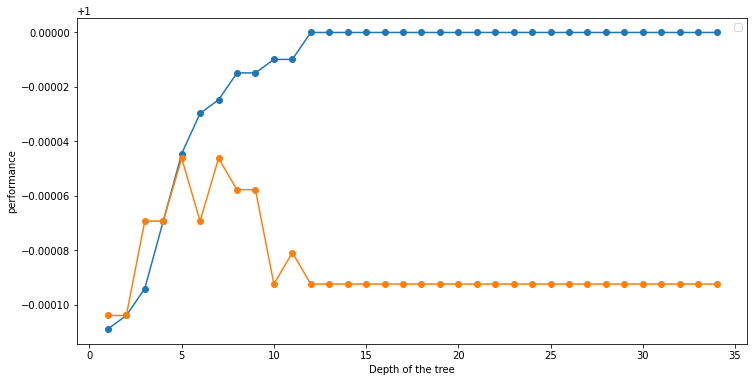

In [14]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of the tree')
plt.ylabel('performance')
plt.legend()

In [25]:
from sklearn.metrics import accuracy_score,f1_score
print(dtc.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
#                , pos_label='positive', average='macro'))

0.9998960510966609
0.9998960510966609
0.5714285714285714


In [19]:
attributes = list(x_train)
sorted(zip(dtc.feature_importances_, attributes), reverse=True)

[(0.29421381390123413, ' Destination Port'),
 (0.24253250450850403, 'Total Length of Fwd Packets'),
 (0.07793287937650752, ' Total Length of Bwd Packets'),
 (0.07092267151442117, ' Fwd IAT Mean'),
 (0.06044793849075263, ' Total Fwd Packets'),
 (0.04753435333500769, 'Bwd Packet Length Max'),
 (0.035725550818184446, ' Fwd IAT Min'),
 (0.03563597475763389, 'Fwd Packets/s'),
 (0.03125433183328687, ' Avg Fwd Segment Size'),
 (0.026789427285674464, ' Packet Length Mean'),
 (0.023812824253932857, 'Fwd PSH Flags'),
 (0.01785961819044964, ' Fwd Header Length.1'),
 (0.013394713642837232, 'Init_Win_bytes_forward'),
 (0.01097639305711479, ' Subflow Fwd Bytes'),
 (0.004680817503160403, ' Idle Std'),
 (0.004295619067134138, ' Flow IAT Std'),
 (0.0011462904292957956, ' Active Min'),
 (0.0005108401257961967, ' Fwd IAT Std'),
 (0.00016709626519566966, ' act_data_pkt_fwd'),
 (8.776265072989768e-05, ' Bwd IAT Std'),
 (7.658443837489343e-05, ' Flow Duration'),
 (1.994554771708816e-06, ' URG Flag Count'),


In [30]:
print('---------------------------Random Forest CLassifier------------------')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =5)
model = model.fit(x_train, y_train)
rfy_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(model.score(x_test,y_test))

---------------------------Random Forest CLassifier------------------
0.9999422506092561


In [31]:
attributes = list(x_train)
sorted(zip(model.feature_importances_, attributes), reverse=True)

[(0.17911642800912958, ' Bwd Packet Length Mean'),
 (0.09776626075484096, ' Fwd IAT Min'),
 (0.08416146671289806, 'Bwd Packet Length Max'),
 (0.06031401094098998, ' Subflow Fwd Bytes'),
 (0.05254070505987143, ' act_data_pkt_fwd'),
 (0.04018493669739659, ' Packet Length Mean'),
 (0.0400059408587481, 'Total Length of Fwd Packets'),
 (0.03910668515910216, ' Fwd IAT Mean'),
 (0.031238948483591333, ' Fwd IAT Max'),
 (0.029827215562021447, ' Bwd IAT Std'),
 (0.028001760454215784, ' Fwd Packet Length Max'),
 (0.026377282250510226, ' Avg Bwd Segment Size'),
 (0.025897127704757505, ' Flow IAT Max'),
 (0.024969221070125752, 'Idle Mean'),
 (0.021029299121913793, ' Max Packet Length'),
 (0.019976892571310315, 'Fwd PSH Flags'),
 (0.019683093423714975, ' Destination Port'),
 (0.01729459553642333, ' Avg Fwd Segment Size'),
 (0.013354500471181089, 'Fwd IAT Total'),
 (0.012960483246956048, 'Active Mean'),
 (0.012944179325393265, ' Average Packet Size'),
 (0.012910833802914717, ' Packet Length Variance'

In [32]:
print(f1_score(y_test, y_pred))

0.5714285714285714


In [33]:
print('---------------------------Random Forest Regressor------------------')

---------------------------Random Forest Regressor------------------


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  
attributes = list(x_train)
sorted(zip(regressor.feature_importances_, attributes), reverse=True)

[(0.19650809749079787, ' Destination Port'),
 (0.14422500014267023, 'Total Length of Fwd Packets'),
 (0.10614185900108838, ' Subflow Fwd Bytes'),
 (0.06470778481083443, ' Active Min'),
 (0.05258382790109936, ' Avg Bwd Segment Size'),
 (0.05252381736250658, ' Flow IAT Min'),
 (0.04125490106288707, ' Packet Length Variance'),
 (0.03457577458749748, ' Flow IAT Mean'),
 (0.03365130165603248, ' Fwd IAT Min'),
 (0.027002338392983948, ' Bwd Packet Length Mean'),
 (0.026042404212753265, 'Bwd Packet Length Max'),
 (0.023186360475289183, ' Flow IAT Max'),
 (0.022136907628757092, ' Fwd Packet Length Std'),
 (0.018359006151402006, ' SYN Flag Count'),
 (0.017270363826473543, ' Subflow Bwd Packets'),
 (0.017126965349123273, 'Fwd IAT Total'),
 (0.01624146151429099, ' Fwd IAT Mean'),
 (0.015275900699049397, ' Total Backward Packets'),
 (0.014046340765434186, ' Fwd Header Length.1'),
 (0.014010817635584543, ' Idle Std'),
 (0.011946533749297267, ' Bwd IAT Min'),
 (0.008663575201803088, ' Active Max'),
 